__Regression of Air France Revenue:__

In [8]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
# Hierarchical CLustering of OECD Composite Indicator
# Import normalize
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from scipy.stats import kurtosis, skew
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pdb

mpl.rcParams['figure.figsize'] = 20, 5
mpl.rcParams['lines.linewidth'] = 2
%matplotlib inline

In [15]:
mpl.rcParams['figure.figsize'] = 20, 5
mpl.rcParams['lines.linewidth'] = 2
df = pd.read_excel('fpregress.xlsx', parse_dates=['Dates'], index_col='Dates')
data = df.fillna(method='ffill').fillna(method='bfill').dropna(axis=1)
data.head(40).pct_change().iloc[[0,2,-2,-1],:]

,SALES_REV_TURN,EBITDA,OPER_MARGIN,LOAD_FACTOR,BS_INVENTORIES,BS_ACCT_NOTE_RCV,BS_ACCT_PAYABLE,TOTAL_EQUITY,BS_TOT_ASSET,SHORT_AND_LONG_TERM_DEBT,REV_PASS_CARRIED,YIELD_PER_PASS_MILES_KM,CURRENT_FUEL_HEDGE_PERC,FUEL_EXPENSES,AVERAGE_PASSENGER_FARE,CF_FREE_CASH_FLOW,PE_RATIO,CO1 Comdty,VGK US Equity,OEOEKLAR Index
Dates,,,,,,,,,,,,,,,,,,,,
2001-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-28,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-09-30,0.0,2.0,-4.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
2011-12-30,-0.0,-1.0,-2.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-1.0,0.0,0.0,-0.0,0.0


In [7]:
df_model = data.round(1)
df_model.plot()

NameError: name 'data' is not defined

In [96]:
y_names = ['EBITDA']

# df_model = df_model.drop(columns='Adj Close')
features_names_model = df_model.columns.drop(y_names).tolist()      

feature_target_df = df_model[y_names + features_names_model].pct_change().dropna()
targets = df_model[y_names]
features = df_model[features_names_model]
features

,SALES_REV_TURN,OPER_MARGIN,LOAD_FACTOR,BS_INVENTORIES,BS_ACCT_NOTE_RCV,BS_ACCT_PAYABLE,TOTAL_EQUITY,BS_TOT_ASSET,SHORT_AND_LONG_TERM_DEBT,REV_PASS_CARRIED,YIELD_PER_PASS_MILES_KM,CURRENT_FUEL_HEDGE_PERC,FUEL_EXPENSES,AVERAGE_PASSENGER_FARE,CF_FREE_CASH_FLOW,PE_RATIO,CO1 Comdty,VGK US Equity,OEOEKLAR Index
Dates,,,,,,,,,,,,,,,,,,,
2001-06-29,3374,4.4646,75.000,297.0,1456.0,1377.0,4140.0,13194.0,4355.0,13723.0,9.0000,70.0,353.0,181.7387,-88.0,28.4495,25.87215,37.97810,78.4651
2001-09-28,3207,4.4646,75.000,297.0,1456.0,1377.0,4140.0,13194.0,4355.0,13723.0,9.0000,70.0,353.0,181.7387,-88.0,28.4495,32.00042,37.97810,79.0097
2001-12-28,2907,4.4646,75.000,297.0,1456.0,1377.0,4140.0,13194.0,4355.0,13723.0,9.0000,70.0,353.0,181.7387,-88.0,28.4495,33.79006,37.97810,79.3613
2002-03-28,3040,4.4646,75.000,297.0,1456.0,1377.0,4140.0,13194.0,4355.0,13723.0,9.0000,70.0,353.0,181.7387,-88.0,28.4495,25.40713,37.97810,79.4008
2002-06-28,3315,4.4646,75.000,297.0,1456.0,1377.0,4140.0,13194.0,4355.0,13723.0,9.0000,70.0,353.0,181.7387,-88.0,31.1009,28.12003,37.97810,79.2291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-28,7545,14.3804,88.300,676.0,2621.0,2610.0,3292.0,30828.0,11520.0,28532.0,8.4563,59.0,1377.0,253.8553,156.0,420.3129,43.69434,43.40043,102.7172
2018-12-31,6538,0.5200,86.100,633.0,2191.0,2460.0,1865.0,29057.0,11099.0,24462.0,7.4717,59.0,1336.0,210.8577,189.0,9.9849,53.87314,45.45368,103.6051
2019-03-29,5986,-4.7611,86.774,686.0,2592.0,2463.0,1933.0,30584.0,11280.0,22674.0,7.4357,62.0,1201.0,215.0922,452.0,12.2340,49.38768,48.20978,104.4817


__Test-Train split__

In [97]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.60 * features.shape[0])
train_features = X = linear_features[:train_size]
train_targets  = Y = targets[:train_size]
test_features  = x = linear_features[train_size:]
test_targets   = y = targets[train_size:]

print(linear_features.shape, train_features.shape, test_features.shape)

(71, 20) (42, 20) (29, 20)


__Vector Auto Regressive Model__

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic, bic, hqic

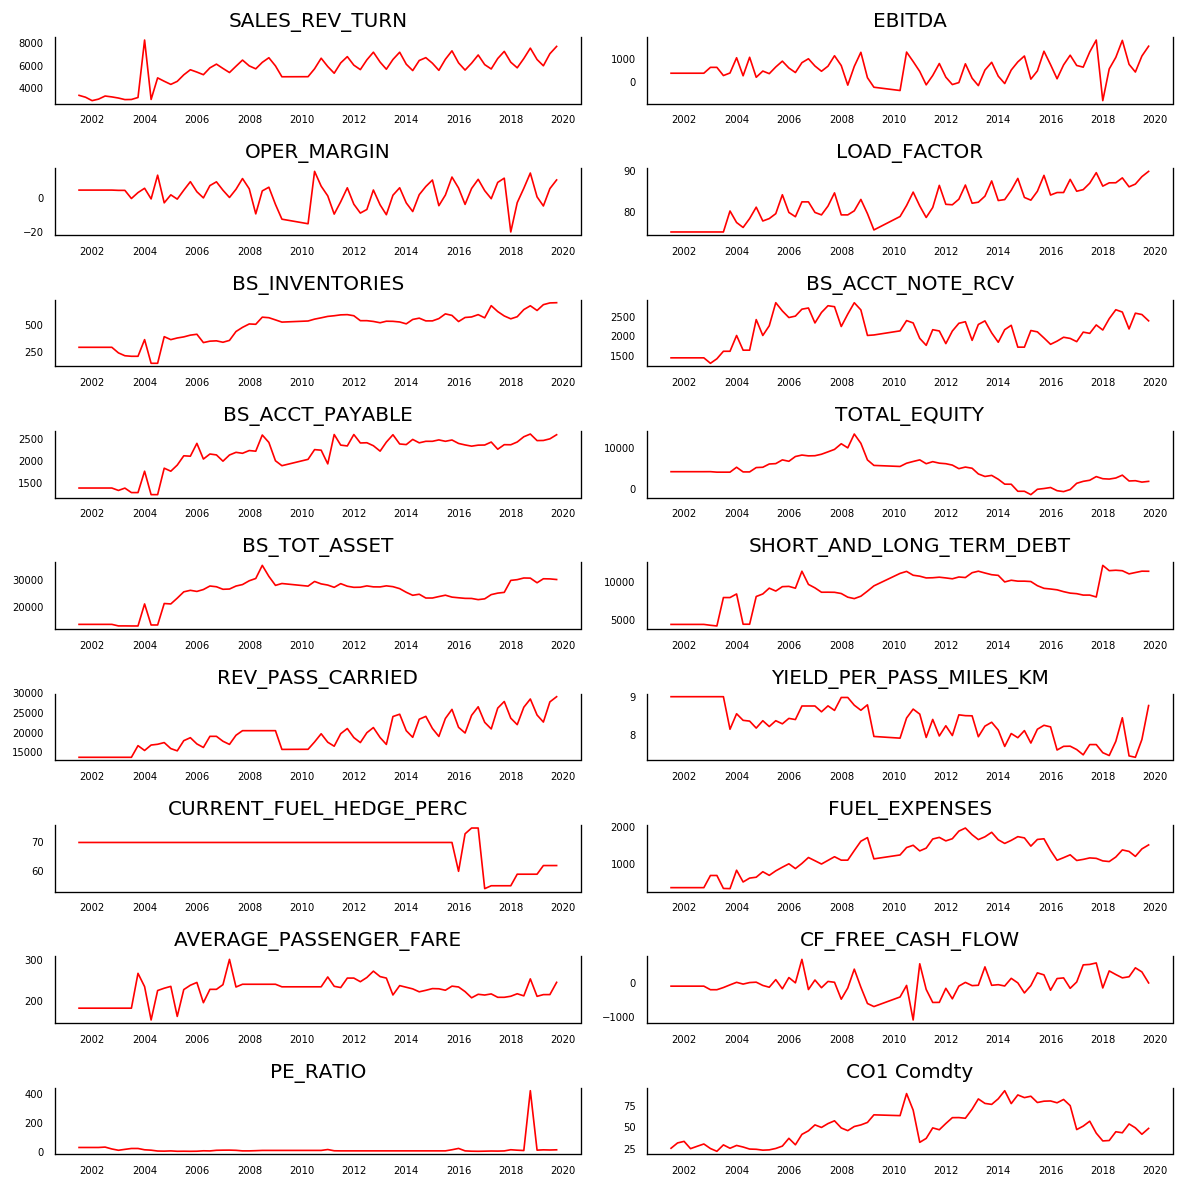

In [99]:
df = df_model
# Plot
fig, axes = plt.subplots(nrows=9, ncols=2, dpi=120, figsize=(10,10))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [100]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)        

,SALES_REV_TURN_x,EBITDA_x,OPER_MARGIN_x,LOAD_FACTOR_x,BS_INVENTORIES_x,BS_ACCT_NOTE_RCV_x,BS_ACCT_PAYABLE_x,TOTAL_EQUITY_x,BS_TOT_ASSET_x,SHORT_AND_LONG_TERM_DEBT_x,REV_PASS_CARRIED_x,YIELD_PER_PASS_MILES_KM_x,CURRENT_FUEL_HEDGE_PERC_x,FUEL_EXPENSES_x,AVERAGE_PASSENGER_FARE_x,CF_FREE_CASH_FLOW_x,PE_RATIO_x,CO1 Comdty_x,VGK US Equity_x,OEOEKLAR Index_x
SALES_REV_TURN_y,1.0000,0.0003,0.0000,0.0000,0.0002,0.0000,0.0000,0.0003,0.0000,0.0000,0.0000,0.0000,0.2439,0.0000,0.0000,0.0050,0.0150,0.0168,0.1048,0.0000
EBITDA_y,0.3075,1.0000,0.0001,0.0032,0.1060,0.0002,0.1650,0.0001,0.0984,0.1455,0.0000,0.0034,0.0000,0.0291,0.0495,0.0002,0.0567,0.3373,0.0002,0.0401
OPER_MARGIN_y,0.0950,0.0000,1.0000,0.0014,0.0299,0.0004,0.0403,0.0001,0.0085,0.1002,0.0000,0.3035,0.0000,0.0006,0.0051,0.0074,0.0757,0.3877,0.0017,0.4707
LOAD_FACTOR_y,0.0012,0.0000,0.0000,1.0000,0.0038,0.0000,0.0003,0.0000,0.0017,0.0095,0.0000,0.0000,0.0761,0.0178,0.0138,0.0183,0.4731,0.0209,0.0577,0.0000
BS_INVENTORIES_y,0.0000,0.0399,0.2165,0.0007,1.0000,0.3900,0.3066,0.0068,0.2192,0.0704,0.0034,0.0055,0.0000,0.0033,0.0028,0.0000,0.0000,0.0464,0.0001,0.0001
BS_ACCT_NOTE_RCV_y,0.0000,0.0005,0.0003,0.0002,0.0029,1.0000,0.0903,0.0000,0.0000,0.0000,0.0041,0.0193,0.1985,0.0006,0.0929,0.0669,0.1229,0.0393,0.0815,0.0336
BS_ACCT_PAYABLE_y,0.0006,0.0432,0.0030,0.0135,0.1442,0.4031,1.0000,0.0000,0.0001,0.0025,0.0123,0.0042,0.5090,0.0000,0.0077,0.0000,0.1412,0.1122,0.1060,0.0029
TOTAL_EQUITY_y,0.0477,0.0989,0.0282,0.0032,0.0629,0.2214,0.0101,1.0000,0.0389,0.1689,0.0000,0.0679,0.6657,0.0035,0.0002,0.0005,0.1114,0.1138,0.2992,0.1248
BS_TOT_ASSET_y,0.0000,0.0343,0.0409,0.0029,0.0217,0.0001,0.0147,0.0282,1.0000,0.0016,0.3376,0.0399,0.1483,0.0000,0.0014,0.0804,0.0494,0.0589,0.4337,0.1957
SHORT_AND_LONG_TERM_DEBT_y,0.0000,0.2884,0.4257,0.1185,0.0000,0.0082,0.0821,0.0774,0.0012,1.0000,0.0890,0.0169,0.0000,0.0001,0.0047,0.8355,0.0000,0.1157,0.1289,0.0385


In [101]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
SALES_REV_TURN ::  2185.44   > nan       =>   False
EBITDA ::  1751.94   > nan       =>   False
OPER_MARGIN ::  1434.29   > nan       =>   False
LOAD_FACTOR ::  1168.42   > nan       =>   False
BS_INVENTORIES ::  935.89    > nan       =>   False
BS_ACCT_NOTE_RCV ::  772.03    > nan       =>   False
BS_ACCT_PAYABLE ::  625.42    > nan       =>   False
TOTAL_EQUITY ::  494.24    > nan       =>   False
BS_TOT_ASSET ::  395.17    > 311.1288  =>   True
SHORT_AND_LONG_TERM_DEBT ::  308.46    > 263.2603  =>   True
REV_PASS_CARRIED ::  231.11    > 219.4051  =>   True
YIELD_PER_PASS_MILES_KM ::  163.05    > 179.5199  =>   False
CURRENT_FUEL_HEDGE_PERC ::  103.0     > 143.6691  =>   False
FUEL_EXPENSES ::  63.01     > 111.7797  =>   False
AVERAGE_PASSENGER_FARE ::  38.91     > 83.9383   =>   False
CF_FREE_CASH_FLOW ::  24.06     > 60.0627   =>   False
PE_RATIO ::  12.52     > 40.1749   =>   False
CO1 Comdty 

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:608: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  category=HypothesisTestWarning)


In [102]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(67, 20)
(4, 20)


In [103]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [104]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SALES_REV_TURN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5958
 No. Lags Chosen       = 7
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.0058. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EBITDA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3847
 No. Lags Chosen       = 3
 Critical value 1%     = -3.539
 Critical value 5%     = -2.909
 Critical value 10%    = -2.592
 => P-Value = 0.1461. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "OPER_MARGIN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root.

In [6]:
# 1st difference
df_differenced = df_train.diff().dropna()

AttributeError: 'float' object has no attribute 'round'

In [106]:
# ADF Test on each column
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SALES_REV_TURN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4683
 No. Lags Chosen       = 6
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EBITDA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5736
 No. Lags Chosen       = 5
 Critical value 1%     = -3.544
 Critical value 5%     = -2.911
 Critical value 10%    = -2.593
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "OPER_MARGIN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signifi

In [107]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [108]:
# ADF Test on each column
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SALES_REV_TURN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.2059
 No. Lags Chosen       = 7
 Critical value 1%     = -3.551
 Critical value 5%     = -2.914
 Critical value 10%    = -2.595
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EBITDA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.8146
 No. Lags Chosen       = 9
 Critical value 1%     = -3.555
 Critical value 5%     = -2.916
 Critical value 10%    = -2.596
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "OPER_MARGIN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signifi

In [109]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  153.4488093431691
BIC :  167.61647957771694
FPE :  7.25881085611287e+66
HQIC:  159.03017029415298 

Lag Order = 2
AIC :  120.79266616595947
BIC :  148.6874356205794
FPE :  4.429532412214792e+54
HQIC:  131.7638153379944 

Lag Order = 3


c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


LinAlgError: 2-th leading minor of the array is not positive definite

In [110]:
x = model.select_order(maxlags=12)
x.summary()

LinAlgError: 14-th leading minor of the array is not positive definite

In [111]:
model_fitted = model.fit(4)
model_fitted.summary()

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1431: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self._cov_params()))
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Feb, 2020
Time:                     12:27:52
--------------------------------------------------------------------
No. of Equations:         20.0000    BIC:                   -940.318
Nobs:                     61.0000    HQIC:                  -974.407
Log likelihood:           30278.4    FPE:                    0.00000
AIC:                     -996.378    Det(Omega_mle):         0.00000
--------------------------------------------------------------------
Results for equation SALES_REV_TURN
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                              -3.704417              NAN              NAN             NAN
L1.SALES_REV_TURN                  -1.533752         0.000001     -2649790.608           0

In [112]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

NameError: name 'adjust' is not defined

In [113]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[-1.587000e+03, -3.095000e+03, -3.373160e+01, -5.892400e+00,
         1.400000e+01, -3.430000e+02, -1.060000e+02, -1.410000e+03,
         4.284000e+03,  4.475000e+03, -5.918000e+03, -2.093000e-01,
         0.000000e+00, -5.700000e+01,  2.591000e+00, -7.810000e+02,
         7.009200e+00,  4.810860e+00,  6.341390e+00, -5.990000e-02],
       [ 4.630000e+02,  3.939000e+03,  4.830000e+01,  4.121200e+00,
         4.500000e+01,  4.170000e+02,  6.500000e+01,  4.300000e+02,
        -4.286000e+03, -4.929000e+03,  2.588000e+03,  1.355000e-01,
         4.000000e+00,  5.100000e+01,  3.554300e+00,  1.239000e+03,
        -1.130620e+01,  9.434150e+00, -5.195460e+00, -1.867000e-01],
       [ 1.313000e+03, -8.590000e+02, -8.679800e+00, -7.900000e-01,
         4.600000e+01, -6.000000e+01,  5.700000e+01,  3.480000e+02,
         3.520000e+02,  7.660000e+02,  6.076000e+03,  4.402000e-01,
        -4.000000e+00,  1.410000e+02, -1.130560e+01, -6.090000e+02,
         8.579000e-01,  9.585080e+00,  2.77828

In [114]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,SALES_REV_TURN_2d,EBITDA_2d,OPER_MARGIN_2d,LOAD_FACTOR_2d,BS_INVENTORIES_2d,BS_ACCT_NOTE_RCV_2d,BS_ACCT_PAYABLE_2d,TOTAL_EQUITY_2d,BS_TOT_ASSET_2d,SHORT_AND_LONG_TERM_DEBT_2d,REV_PASS_CARRIED_2d,YIELD_PER_PASS_MILES_KM_2d,CURRENT_FUEL_HEDGE_PERC_2d,FUEL_EXPENSES_2d,AVERAGE_PASSENGER_FARE_2d,CF_FREE_CASH_FLOW_2d,PE_RATIO_2d,CO1 Comdty_2d,VGK US Equity_2d,OEOEKLAR Index_2d
Dates,,,,,,,,,,,,,,,,,,,,
2018-12-31,1845.689729,-5739.812633,-88.215477,3.968163,212.864406,-194.595486,952.232050,-3.629461e+04,-3.094875e+04,-7976.773365,-1.328163e+04,3.371762,-35.943980,-2342.692918,-829.928645,5405.409455,1173.415861,-267.521507,-136.005817,-32.445618
2019-03-29,-22726.300693,-15236.017972,-271.219068,-53.627372,-1137.017688,-11691.638330,-3612.837216,-1.258496e+05,-1.268374e+05,-14550.500029,-7.869656e+04,20.952660,-20.713239,1652.712901,-2575.621043,12715.350179,5129.075281,-853.501457,-611.194971,-137.802582
2019-06-28,-81965.926622,-66149.758729,-1204.964706,-141.075914,-4444.250144,-39923.540803,-7927.954330,-6.070668e+05,-6.290291e+05,-138000.849425,-3.470580e+05,82.223878,-15.250667,-59.575930,-11153.954861,41913.247003,25573.789381,-4110.825700,-2670.916541,-596.377348
2019-09-30,-334394.394094,-336183.042705,-5918.981825,-703.520857,-16114.013756,-167664.201393,-30310.706298,-2.875763e+06,-2.893418e+06,-438536.357019,-1.631220e+06,407.285420,-428.521551,-25337.413220,-55817.724096,254498.233019,121727.218044,-19237.954456,-12654.687518,-2825.511511


In [115]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [116]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast', 
                   'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

KeyError: "None of [Index(['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',\n       'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast'],\n      dtype='object')] are in the [columns]"

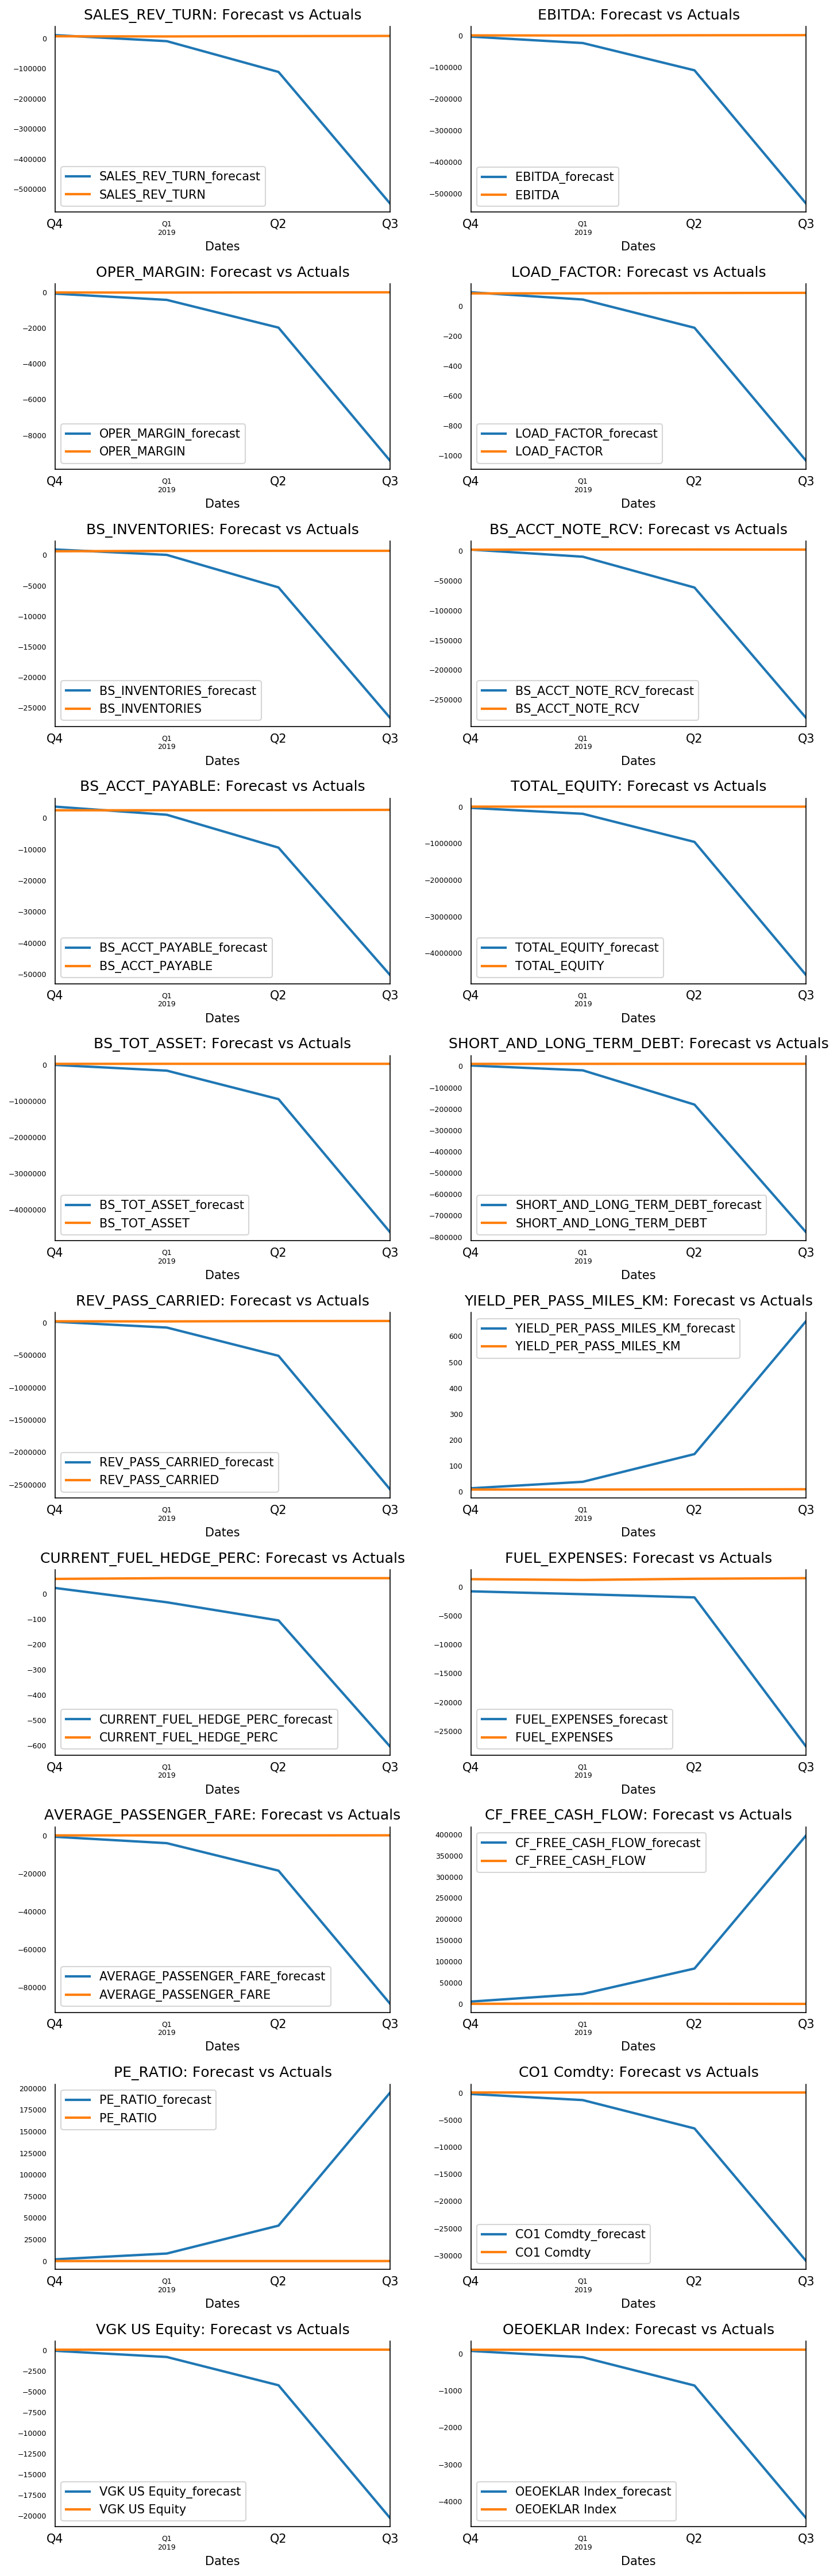

In [117]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,30))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [118]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: rgnp')
accuracy_prod = forecast_accuracy(df_results['rgnp_forecast'].values, df_test['rgnp'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: pgnp')
accuracy_prod = forecast_accuracy(df_results['pgnp_forecast'].values, df_test['pgnp'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: ulc')
accuracy_prod = forecast_accuracy(df_results['ulc_forecast'].values, df_test['ulc'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfco')
accuracy_prod = forecast_accuracy(df_results['gdfco_forecast'].values, df_test['gdfco'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdf')
accuracy_prod = forecast_accuracy(df_results['gdf_forecast'].values, df_test['gdf'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfim')
accuracy_prod = forecast_accuracy(df_results['gdfim_forecast'].values, df_test['gdfim'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfcf')
accuracy_prod = forecast_accuracy(df_results['gdfcf_forecast'].values, df_test['gdfcf'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfce')
accuracy_prod = forecast_accuracy(df_results['gdfce_forecast'].values, df_test['gdfce'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: rgnp


KeyError: 'rgnp_forecast'